In [3]:
import pandas as pd
import numpy as np

In [4]:
#Load the data set and define the characteristics
path = r'G:\data\ERA5\mln_test_data\new\ML1.csv' 
rawdata = pd.read_csv(path).set_index('index')  
x = rawdata.drop('sm',axis = 1) 
y = rawdata['sm']  

In [8]:
#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state=0,
                                                 shuffle=False) #test subsets is 30% ,train subsets is 70%

test_size:If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
train_size:If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.
random_state:Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. 
shuffle:Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

In [9]:
#Define a random forest regressor and train model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=None)
rfr.fit(x_train,y_train) 
y_pred = rfr.predict(x_test) 

Here are three important parameters in RandomForestRegressor:
n_estimatorsint:The number of trees in the forest.

max_features{“sqrt”, “log2”, None}:The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
If “sqrt”, then max_features=sqrt(n_features).If “log2”, then max_features=log2(n_features).If None or 1.0, then max_features=n_features.

max_depthint:The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

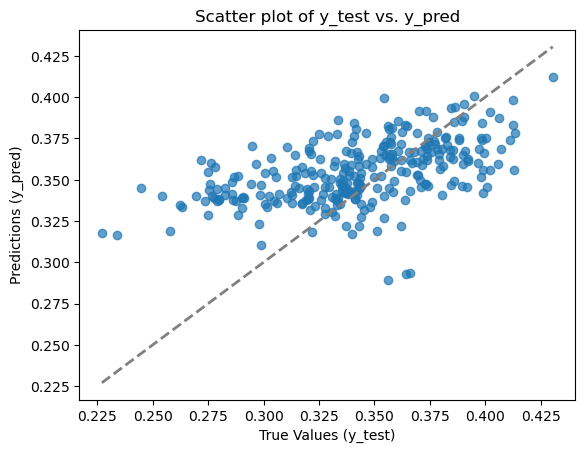

In [13]:
# Draw the scatter 
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='grey', linewidth=2)
plt.title(f'Scatter plot of y_test vs. y_pred')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.show()